In [1]:
# Import required libraries
import pandas as pd
from sklearn.metrics import roc_curve, auc, plot_roc_curve, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from random_forest_functions import *
import sys

In [2]:
random_seed = 51

In [3]:
# Load in the medical claims data
medical_claims = pd.read_csv('Data/med_full_final_melted.csv')
medical_claims

# Load in the pharmacy claims data
rx_claims = pd.read_csv('Data/rx_full_final.csv')

# Load in the edges file and exclusions file
edges = pd.read_csv('Data/edges.csv')
exclusions = pd.read_csv('Data/exclusions.csv')
exclusion_list = exclusions['Base Code'].to_list()

all_data_with_ages_without_timebound = pd.read_csv('./Data/all_data_with_ages.csv')

C:\Users\sarfu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
E11_random_forest_hyper_params_with_ages_without_timebound={'max_depth': 8, 'n_estimators': 300}
C18_random_forest_hyper_params_with_ages_without_timebound={'max_depth': 2, 'n_estimators': 100}
C50_random_forest_hyper_params_with_ages_without_timebound={'max_depth': 8, 'n_estimators': 100}
I10_random_forest_hyper_params_with_ages_without_timebound={'max_depth': 8, 'n_estimators': 400}
I25_random_forest_hyper_params_with_ages_without_timebound={'max_depth': 8, 'n_estimators': 300}
N18_random_forest_hyper_params_with_ages_without_timebound={'max_depth': 6, 'n_estimators': 400}

E11_random_forest_hyper_params_with_ages_with_timebound={'max_depth': 2, 'n_estimators': 100}
C18_random_forest_hyper_params_with_ages_with_timebound={'max_depth': 2, 'n_estimators': 100}
C50_random_forest_hyper_params_with_ages_with_timebound={'max_depth': 8, 'n_estimators': 300}
I10_random_forest_hyper_params_with_ages_with_timebound={'max_depth': 8, 'n_estimators': 300}
I25_random_forest_hyper_params_with_ages_with_timebound={'max_depth': 8, 'n_estimators': 100}
N18_random_forest_hyper_params_with_ages_with_timebound={'max_depth': 6, 'n_estimators': 300}

E11 with age with Timebound Models Accuracy is 0.7747839821611074 and Sensitivity is 0.8164754953076121 for threshold 0.5


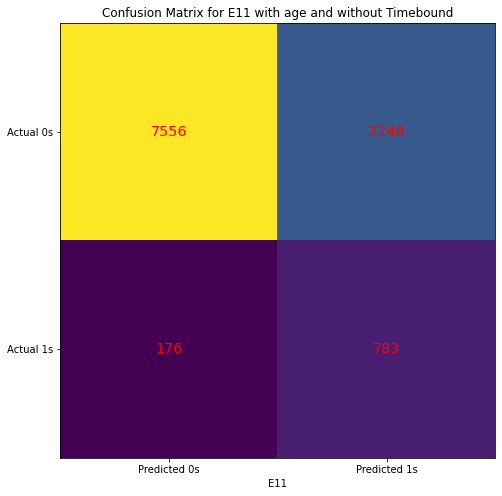



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      9804
           1       0.26      0.82      0.39       959

    accuracy                           0.77     10763
   macro avg       0.62      0.79      0.63     10763
weighted avg       0.91      0.77      0.82     10763



=== All AUC Scores ===
[0.8757851  0.8662418  0.86162443 0.87603834 0.86830229 0.86592943
 0.87284648 0.87121968 0.89270229 0.87341715]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8724106990383248
=== Sensitivity of the Model ===
0.8164754953076121


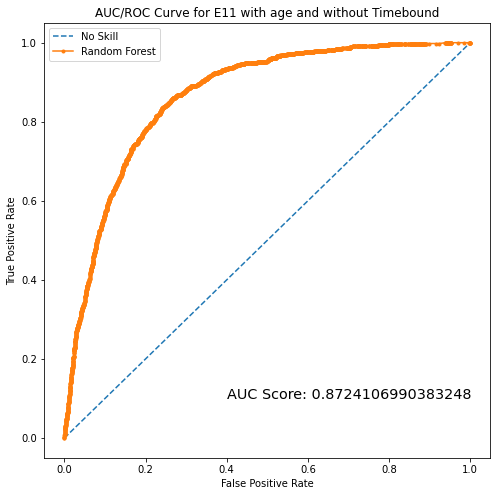

E11 with age with Timebound Models Accuracy is 0.6926793013749536 and Sensitivity is 0.8296760710553814 for threshold 0.5


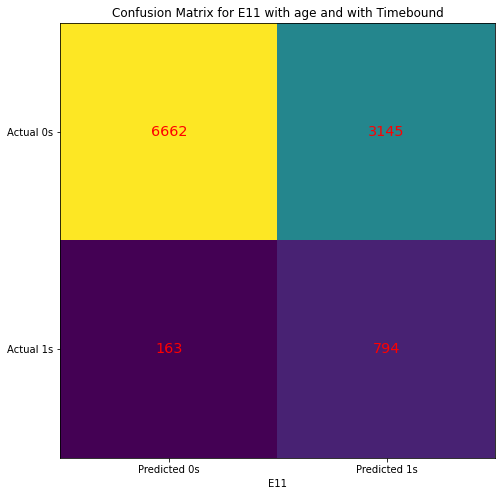



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.68      0.80      9807
           1       0.20      0.83      0.32       957

    accuracy                           0.69     10764
   macro avg       0.59      0.75      0.56     10764
weighted avg       0.91      0.69      0.76     10764



=== All AUC Scores ===
[0.85052143 0.8649931  0.83754669 0.83699143 0.85243964 0.84718142
 0.82254555 0.86807294 0.82660187 0.82170483]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8428598895710705
=== Sensitivity of the Model ===
0.8296760710553814


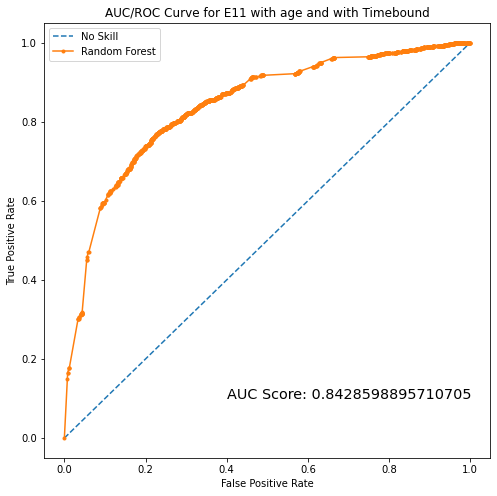

In [5]:
# Model for E11 with Age and Without the Timebound
E11_with_age_without_Timebound_model, E11_with_age_without_Timebound_model_Pred_prob, E11_with_age_without_Timebound_model_pred_codes, E11_with_age_without_Timebound_model_train_test =gen_rf_model(all_data_with_ages_without_timebound, 'E11', edges, exclusion_list, E11_random_forest_hyper_params_with_ages_without_timebound)
E11_with_age_without_Timebound_model_accuracy, E11_with_age_without_Timebound_model_sensitivity,E11_with_age_without_Timebound_model_cm, E11_with_age_without_Timebound_model_model_prediction=get_accuracy_sensitivity(E11_with_age_without_Timebound_model, E11_with_age_without_Timebound_model_train_test, E11_with_age_without_Timebound_model_Pred_prob, 'E11', threshold=.5 )
gen_rf_plot(E11_with_age_without_Timebound_model, E11_with_age_without_Timebound_model_train_test, 'E11' , E11_with_age_without_Timebound_model_model_prediction, E11_with_age_without_Timebound_model_accuracy, E11_with_age_without_Timebound_model_sensitivity,  E11_with_age_without_Timebound_model_cm, type="with age and without Timebound")

# Model for E11 with Age and With the Timebound

E11_with_age_with_Timebound_model, E11_with_age_with_Timebound_model_Pred_prob, E11_with_age_with_Timebound_model_pred_codes, E11_with_age_with_Timebound_model_train_test =gen_rf_model_timebound(medical_claims, rx_claims, 'E11', edges, exclusion_list, E11_random_forest_hyper_params_with_ages_with_timebound)
E11_with_age_with_Timebound_model_accuracy, E11_with_age_with_Timebound_model_sensitivity,E11_with_age_with_Timebound_model_cm, E11_with_age_with_Timebound_model_model_prediction=get_accuracy_sensitivity(E11_with_age_with_Timebound_model, E11_with_age_with_Timebound_model_train_test, E11_with_age_with_Timebound_model_Pred_prob, 'E11', threshold=.5 )
gen_rf_plot(E11_with_age_with_Timebound_model, E11_with_age_with_Timebound_model_train_test, 'E11' , E11_with_age_with_Timebound_model_model_prediction, E11_with_age_with_Timebound_model_accuracy, E11_with_age_with_Timebound_model_sensitivity,  E11_with_age_with_Timebound_model_cm, type="with age and with Timebound")

C18 with age with Timebound Models Accuracy is 0.9009569822540184 and Sensitivity is 0.8387096774193549 for threshold 0.5


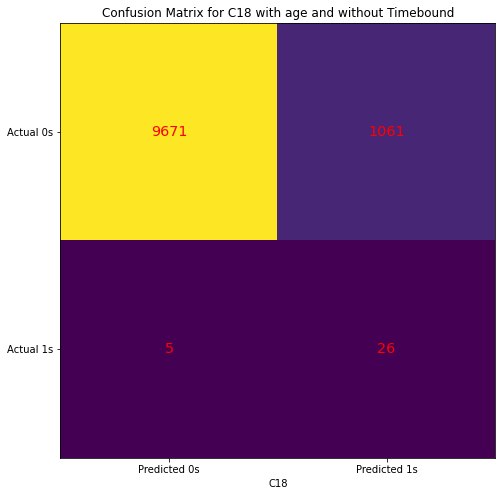



=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     10732
           1       0.02      0.84      0.05        31

    accuracy                           0.90     10763
   macro avg       0.51      0.87      0.50     10763
weighted avg       1.00      0.90      0.95     10763



=== All AUC Scores ===
[0.89215914 0.94683574 0.96049658 0.92548029 0.94981054 0.91927508
 0.96667733 0.92961659 0.93158017 0.89848399]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.932041545676268
=== Sensitivity of the Model ===
0.8387096774193549


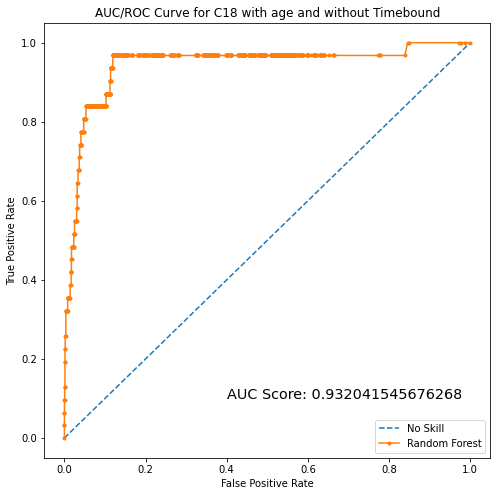

C18 with age with Timebound Models Accuracy is 0.749976772275388 and Sensitivity is 0.7931034482758621 for threshold 0.5


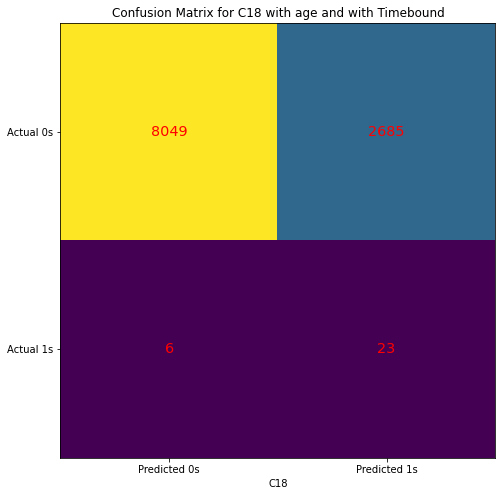



=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     10734
           1       0.01      0.79      0.02        29

    accuracy                           0.75     10763
   macro avg       0.50      0.77      0.44     10763
weighted avg       1.00      0.75      0.85     10763



=== All AUC Scores ===
[0.89887323 0.75058167 0.8571761  0.77824645 0.7710903  0.80848557
 0.88916686 0.85294973 0.92035141 0.84306327]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8369984576716709
=== Sensitivity of the Model ===
0.7931034482758621


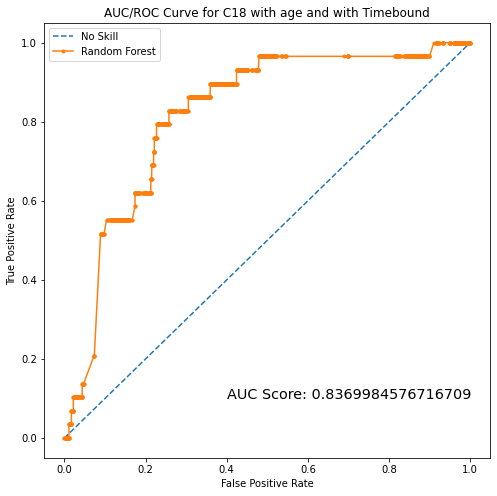

In [6]:
# Model for C18 with Age and Without the Timebound
C18_with_age_without_Timebound_model, C18_with_age_without_Timebound_model_Pred_prob, C18_with_age_without_Timebound_model_pred_codes, C18_with_age_without_Timebound_model_train_test =gen_rf_model(all_data_with_ages_without_timebound, 'C18', edges, exclusion_list, C18_random_forest_hyper_params_with_ages_without_timebound)
C18_with_age_without_Timebound_model_accuracy, C18_with_age_without_Timebound_model_sensitivity,C18_with_age_without_Timebound_model_cm, C18_with_age_without_Timebound_model_model_prediction=get_accuracy_sensitivity(C18_with_age_without_Timebound_model, C18_with_age_without_Timebound_model_train_test, C18_with_age_without_Timebound_model_Pred_prob, 'C18', threshold=.5 )
gen_rf_plot(C18_with_age_without_Timebound_model, C18_with_age_without_Timebound_model_train_test, 'C18' , C18_with_age_without_Timebound_model_model_prediction, C18_with_age_without_Timebound_model_accuracy, C18_with_age_without_Timebound_model_sensitivity,  C18_with_age_without_Timebound_model_cm, type="with age and without Timebound")


# Model for C18 with Age and With the Timebound

C18_with_age_with_Timebound_model, C18_with_age_with_Timebound_model_Pred_prob, C18_with_age_with_Timebound_model_pred_codes, C18_with_age_with_Timebound_model_train_test =gen_rf_model_timebound(medical_claims, rx_claims, 'C18', edges, exclusion_list, C18_random_forest_hyper_params_with_ages_with_timebound)
C18_with_age_with_Timebound_model_accuracy, C18_with_age_with_Timebound_model_sensitivity,C18_with_age_with_Timebound_model_cm, C18_with_age_with_Timebound_model_model_prediction=get_accuracy_sensitivity(C18_with_age_with_Timebound_model, C18_with_age_with_Timebound_model_train_test, C18_with_age_with_Timebound_model_Pred_prob, 'C18', threshold=.5 )
gen_rf_plot(C18_with_age_with_Timebound_model, C18_with_age_with_Timebound_model_train_test, 'C18' , C18_with_age_with_Timebound_model_model_prediction, C18_with_age_with_Timebound_model_accuracy, C18_with_age_with_Timebound_model_sensitivity,  C18_with_age_with_Timebound_model_cm, type="with age and with Timebound")

C50 with age with Timebound Models Accuracy is 0.8279290160735854 and Sensitivity is 0.8631578947368421 for threshold 0.5


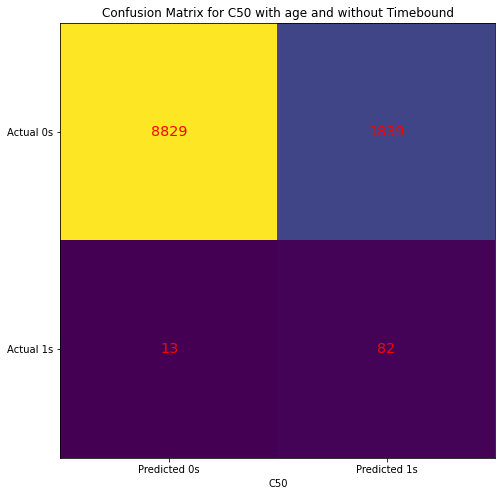



=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     10668
           1       0.04      0.86      0.08        95

    accuracy                           0.83     10763
   macro avg       0.52      0.85      0.49     10763
weighted avg       0.99      0.83      0.90     10763



=== All AUC Scores ===
[0.91262457 0.90562227 0.94156539 0.93932005 0.93654455 0.92730657
 0.94528429 0.90852872 0.94523447 0.94518291]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.930721378436901
=== Sensitivity of the Model ===
0.8631578947368421


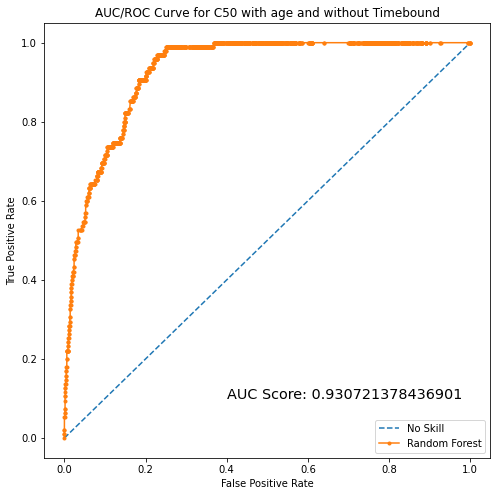

C50 with age with Timebound Models Accuracy is 0.868531078695531 and Sensitivity is 0.7263157894736842 for threshold 0.5


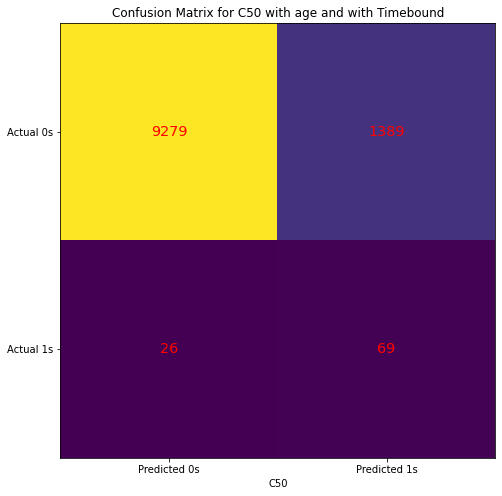



=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     10668
           1       0.05      0.73      0.09        95

    accuracy                           0.87     10763
   macro avg       0.52      0.80      0.51     10763
weighted avg       0.99      0.87      0.92     10763



=== All AUC Scores ===
[0.93636025 0.91999651 0.9575174  0.91662954 0.93473916 0.90962485
 0.92191676 0.92683177 0.93608734 0.93302071]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9292724299802458
=== Sensitivity of the Model ===
0.7263157894736842


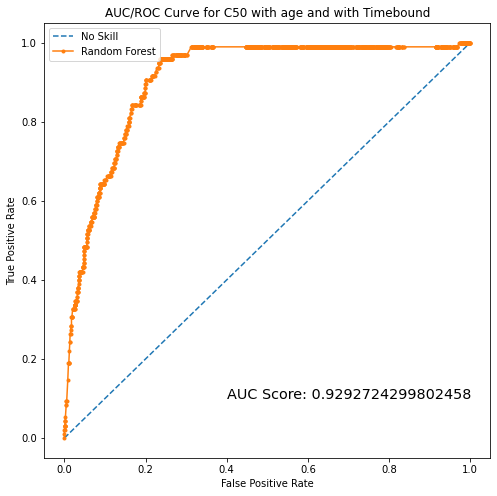

In [7]:
# Model for C50 with Age and Without the Timebound
C50_with_age_without_Timebound_model, C50_with_age_without_Timebound_model_Pred_prob, C50_with_age_without_Timebound_model_pred_codes, C50_with_age_without_Timebound_model_train_test =gen_rf_model(all_data_with_ages_without_timebound, 'C50', edges, exclusion_list, C50_random_forest_hyper_params_with_ages_without_timebound)
C50_with_age_without_Timebound_model_accuracy, C50_with_age_without_Timebound_model_sensitivity,C50_with_age_without_Timebound_model_cm, C50_with_age_without_Timebound_model_model_prediction=get_accuracy_sensitivity(C50_with_age_without_Timebound_model, C50_with_age_without_Timebound_model_train_test, C50_with_age_without_Timebound_model_Pred_prob, 'C50', threshold=.5 )
gen_rf_plot(C50_with_age_without_Timebound_model, C50_with_age_without_Timebound_model_train_test, 'C50' , C50_with_age_without_Timebound_model_model_prediction, C50_with_age_without_Timebound_model_accuracy, C50_with_age_without_Timebound_model_sensitivity,  C50_with_age_without_Timebound_model_cm, type="with age and without Timebound")


# Model for C50 with Age and With the Timebound

C50_with_age_with_Timebound_model, C50_with_age_with_Timebound_model_Pred_prob, C50_with_age_with_Timebound_model_pred_codes, C50_with_age_with_Timebound_model_train_test =gen_rf_model_timebound(medical_claims, rx_claims, 'C50', edges, exclusion_list, C50_random_forest_hyper_params_with_ages_with_timebound)
C50_with_age_with_Timebound_model_accuracy, C50_with_age_with_Timebound_model_sensitivity,C50_with_age_with_Timebound_model_cm, C50_with_age_with_Timebound_model_model_prediction=get_accuracy_sensitivity(C50_with_age_with_Timebound_model, C50_with_age_with_Timebound_model_train_test, C50_with_age_with_Timebound_model_Pred_prob, 'C50', threshold=.5 )
gen_rf_plot(C50_with_age_with_Timebound_model, C50_with_age_with_Timebound_model_train_test, 'C50' , C50_with_age_with_Timebound_model_model_prediction, C50_with_age_with_Timebound_model_accuracy, C50_with_age_with_Timebound_model_sensitivity,  C50_with_age_with_Timebound_model_cm, type="with age and with Timebound")

I10 with age with Timebound Models Accuracy is 0.7933661618507851 and Sensitivity is 0.7946655376799323 for threshold 0.5


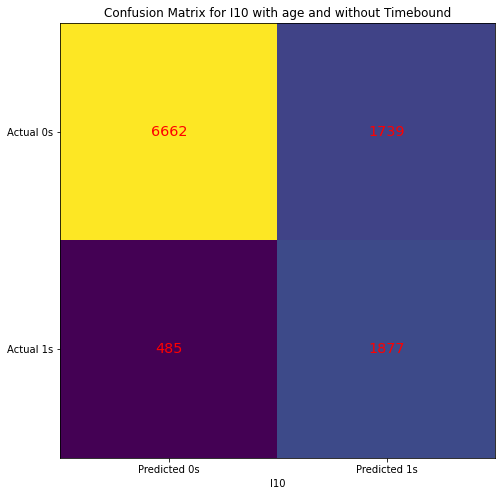



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      8401
           1       0.52      0.79      0.63      2362

    accuracy                           0.79     10763
   macro avg       0.73      0.79      0.74     10763
weighted avg       0.84      0.79      0.81     10763



=== All AUC Scores ===
[0.88182471 0.87383969 0.87287836 0.86759049 0.87349641 0.87607711
 0.86972866 0.88555008 0.883049   0.86781775]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.875185225263991
=== Sensitivity of the Model ===
0.7946655376799323


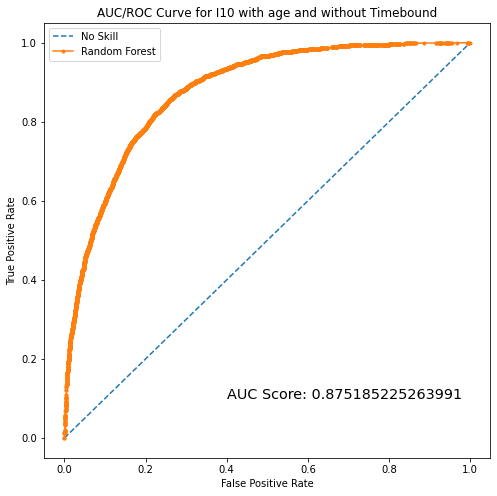

I10 with age with Timebound Models Accuracy is 0.7649790989317232 and Sensitivity is 0.8134490238611713 for threshold 0.5


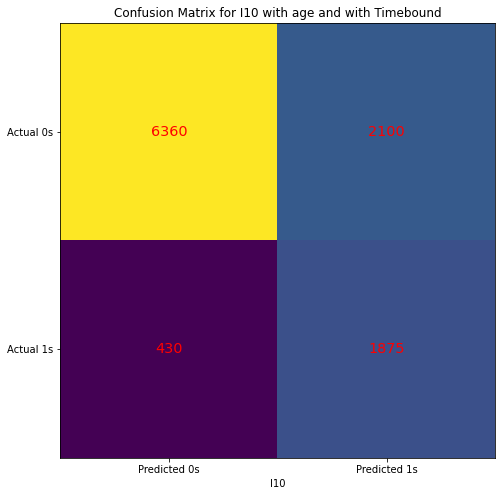



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      8460
           1       0.47      0.81      0.60      2305

    accuracy                           0.76     10765
   macro avg       0.70      0.78      0.72     10765
weighted avg       0.84      0.76      0.78     10765



=== All AUC Scores ===
[0.88106527 0.87359813 0.86764068 0.86882446 0.87507903 0.86514595
 0.8618733  0.8634512  0.87120247 0.8687335 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8696613999460923
=== Sensitivity of the Model ===
0.8134490238611713


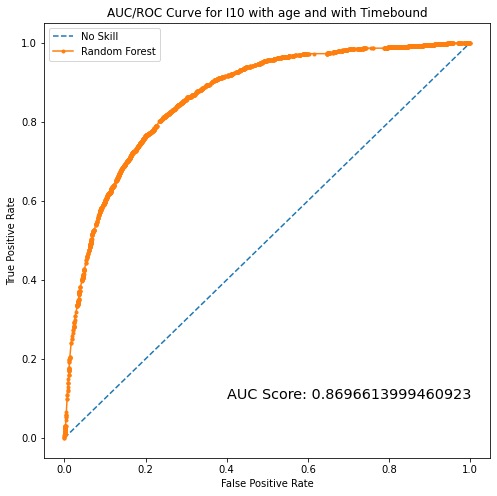

In [8]:
# Model for I10 with Age and Without the Timebound
I10_with_age_without_Timebound_model, I10_with_age_without_Timebound_model_Pred_prob, I10_with_age_without_Timebound_model_pred_codes, I10_with_age_without_Timebound_model_train_test =gen_rf_model(all_data_with_ages_without_timebound, 'I10', edges, exclusion_list, I10_random_forest_hyper_params_with_ages_without_timebound)
I10_with_age_without_Timebound_model_accuracy, I10_with_age_without_Timebound_model_sensitivity,I10_with_age_without_Timebound_model_cm, I10_with_age_without_Timebound_model_model_prediction=get_accuracy_sensitivity(I10_with_age_without_Timebound_model, I10_with_age_without_Timebound_model_train_test, I10_with_age_without_Timebound_model_Pred_prob, 'I10', threshold=.5 )
gen_rf_plot(I10_with_age_without_Timebound_model, I10_with_age_without_Timebound_model_train_test, 'I10' , I10_with_age_without_Timebound_model_model_prediction, I10_with_age_without_Timebound_model_accuracy, I10_with_age_without_Timebound_model_sensitivity,  I10_with_age_without_Timebound_model_cm, type="with age and without Timebound")


# Model for I10 with Age and With the Timebound

I10_with_age_with_Timebound_model, I10_with_age_with_Timebound_model_Pred_prob, I10_with_age_with_Timebound_model_pred_codes, I10_with_age_with_Timebound_model_train_test =gen_rf_model_timebound(medical_claims, rx_claims, 'I10', edges, exclusion_list, I10_random_forest_hyper_params_with_ages_with_timebound)
I10_with_age_with_Timebound_model_accuracy, I10_with_age_with_Timebound_model_sensitivity,I10_with_age_with_Timebound_model_cm, I10_with_age_with_Timebound_model_model_prediction=get_accuracy_sensitivity(I10_with_age_with_Timebound_model, I10_with_age_with_Timebound_model_train_test, I10_with_age_with_Timebound_model_Pred_prob, 'I10', threshold=.5 )
gen_rf_plot(I10_with_age_with_Timebound_model, I10_with_age_with_Timebound_model_train_test, 'I10' , I10_with_age_with_Timebound_model_model_prediction, I10_with_age_with_Timebound_model_accuracy, I10_with_age_with_Timebound_model_sensitivity,  I10_with_age_with_Timebound_model_cm, type="with age and with Timebound")

I25 with age with Timebound Models Accuracy is 0.8130632723218434 and Sensitivity is 0.8598901098901099 for threshold 0.5


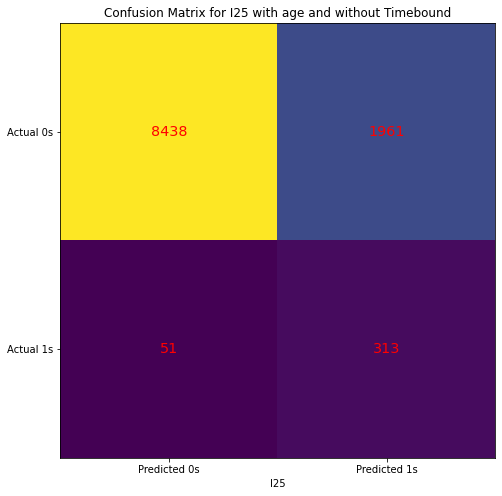



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     10399
           1       0.14      0.86      0.24       364

    accuracy                           0.81     10763
   macro avg       0.57      0.84      0.57     10763
weighted avg       0.97      0.81      0.87     10763



=== All AUC Scores ===
[0.90633537 0.92088926 0.89041463 0.91565035 0.90980026 0.90303906
 0.92619025 0.9021087  0.8740779  0.90234971]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9050855493942349
=== Sensitivity of the Model ===
0.8598901098901099


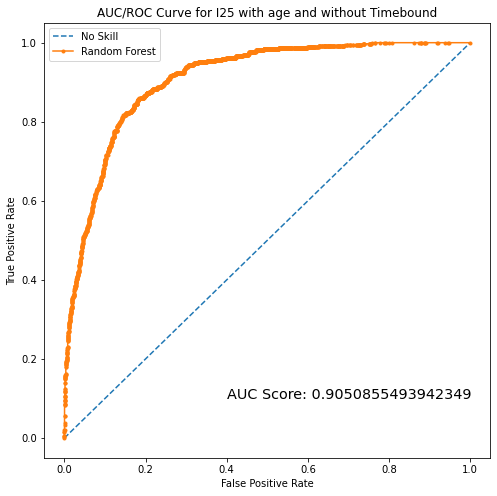

In [ ]:
# Model for I25 with Age and Without the Timebound
I25_with_age_without_Timebound_model, I25_with_age_without_Timebound_model_Pred_prob, I25_with_age_without_Timebound_model_pred_codes, I25_with_age_without_Timebound_model_train_test =gen_rf_model(all_data_with_ages_without_timebound, 'I25', edges, exclusion_list, I25_random_forest_hyper_params_with_ages_without_timebound)
I25_with_age_without_Timebound_model_accuracy, I25_with_age_without_Timebound_model_sensitivity,I25_with_age_without_Timebound_model_cm, I25_with_age_without_Timebound_model_model_prediction=get_accuracy_sensitivity(I25_with_age_without_Timebound_model, I25_with_age_without_Timebound_model_train_test, I25_with_age_without_Timebound_model_Pred_prob, 'I25', threshold=.5 )
gen_rf_plot(I25_with_age_without_Timebound_model, I25_with_age_without_Timebound_model_train_test, 'I25' , I25_with_age_without_Timebound_model_model_prediction, I25_with_age_without_Timebound_model_accuracy, I25_with_age_without_Timebound_model_sensitivity,  I25_with_age_without_Timebound_model_cm, type="with age and without Timebound")


# Model for I25 with Age and With the Timebound

I25_with_age_with_Timebound_model, I25_with_age_with_Timebound_model_Pred_prob, I25_with_age_with_Timebound_model_pred_codes, I25_with_age_with_Timebound_model_train_test =gen_rf_model_timebound(medical_claims, rx_claims, 'I25', edges, exclusion_list, I25_random_forest_hyper_params_with_ages_with_timebound)
I25_with_age_with_Timebound_model_accuracy, I25_with_age_with_Timebound_model_sensitivity,I25_with_age_with_Timebound_model_cm, I25_with_age_with_Timebound_model_model_prediction=get_accuracy_sensitivity(I25_with_age_with_Timebound_model, I25_with_age_with_Timebound_model_train_test, I25_with_age_with_Timebound_model_Pred_prob, 'I25', threshold=.5 )
gen_rf_plot(I25_with_age_with_Timebound_model, I25_with_age_with_Timebound_model_train_test, 'I25' , I25_with_age_with_Timebound_model_model_prediction, I25_with_age_with_Timebound_model_accuracy, I25_with_age_with_Timebound_model_sensitivity,  I25_with_age_with_Timebound_model_cm, type="with age and with Timebound")

N18 with age with Timebound Models Accuracy is 0.868531078695531 and Sensitivity is 0.8041958041958042 for threshold 0.5


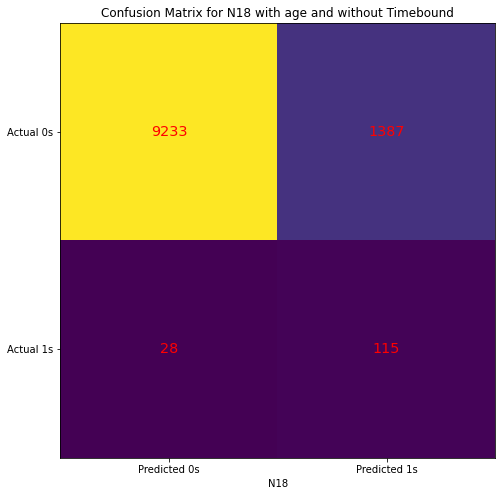



=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     10620
           1       0.08      0.80      0.14       143

    accuracy                           0.87     10763
   macro avg       0.54      0.84      0.53     10763
weighted avg       0.98      0.87      0.92     10763



=== All AUC Scores ===
[0.92057211 0.93363817 0.94203412 0.92967114 0.95578786 0.92444506
 0.9334654  0.93790858 0.91632653 0.94560341]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9339452392686118
=== Sensitivity of the Model ===
0.8041958041958042


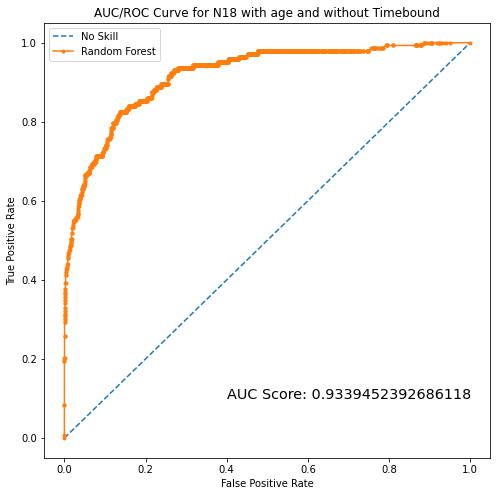

N18 with age with Timebound Models Accuracy is 0.7764563783331785 and Sensitivity is 0.7741935483870968 for threshold 0.5


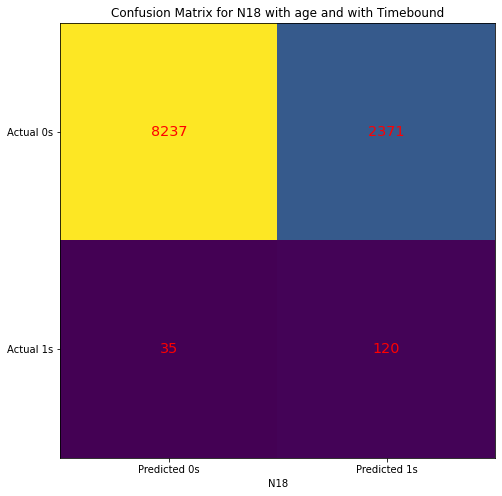



=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.78      0.87     10608
           1       0.05      0.77      0.09       155

    accuracy                           0.78     10763
   macro avg       0.52      0.78      0.48     10763
weighted avg       0.98      0.78      0.86     10763



=== All AUC Scores ===
[0.87699225 0.87901401 0.83948132 0.84114037 0.81911105 0.79884491
 0.8448368  0.81148739 0.84213997 0.85071932]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8403767402414548
=== Sensitivity of the Model ===
0.7741935483870968


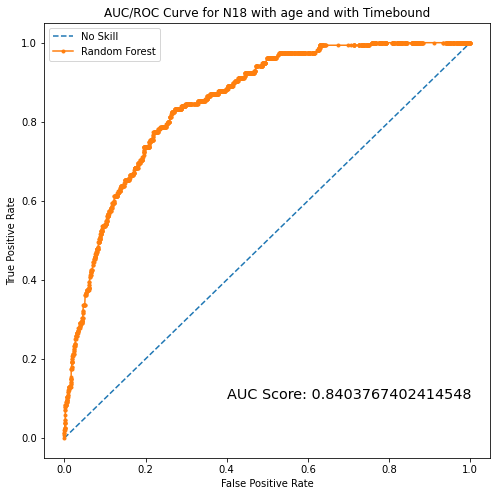

In [5]:
# Model for N18 with Age and Without the Timebound
N18_with_age_without_Timebound_model, N18_with_age_without_Timebound_model_Pred_prob, N18_with_age_without_Timebound_model_pred_codes, N18_with_age_without_Timebound_model_train_test =gen_rf_model(all_data_with_ages_without_timebound, 'N18', edges, exclusion_list, N18_random_forest_hyper_params_with_ages_without_timebound)
N18_with_age_without_Timebound_model_accuracy, N18_with_age_without_Timebound_model_sensitivity,N18_with_age_without_Timebound_model_cm, N18_with_age_without_Timebound_model_model_prediction=get_accuracy_sensitivity(N18_with_age_without_Timebound_model, N18_with_age_without_Timebound_model_train_test, N18_with_age_without_Timebound_model_Pred_prob, 'N18', threshold=.5 )
gen_rf_plot(N18_with_age_without_Timebound_model, N18_with_age_without_Timebound_model_train_test, 'N18' , N18_with_age_without_Timebound_model_model_prediction, N18_with_age_without_Timebound_model_accuracy, N18_with_age_without_Timebound_model_sensitivity,  N18_with_age_without_Timebound_model_cm, type="with age and without Timebound")


# Model for N18 with Age and With the Timebound

N18_with_age_with_Timebound_model, N18_with_age_with_Timebound_model_Pred_prob, N18_with_age_with_Timebound_model_pred_codes, N18_with_age_with_Timebound_model_train_test =gen_rf_model_timebound(medical_claims, rx_claims, 'N18', edges, exclusion_list, N18_random_forest_hyper_params_with_ages_with_timebound)
N18_with_age_with_Timebound_model_accuracy, N18_with_age_with_Timebound_model_sensitivity,N18_with_age_with_Timebound_model_cm, N18_with_age_with_Timebound_model_model_prediction=get_accuracy_sensitivity(N18_with_age_with_Timebound_model, N18_with_age_with_Timebound_model_train_test, N18_with_age_with_Timebound_model_Pred_prob, 'N18', threshold=.5 )
gen_rf_plot(N18_with_age_with_Timebound_model, N18_with_age_with_Timebound_model_train_test, 'N18' , N18_with_age_with_Timebound_model_model_prediction, N18_with_age_with_Timebound_model_accuracy, N18_with_age_with_Timebound_model_sensitivity,  N18_with_age_with_Timebound_model_cm, type="with age and with Timebound")